In [1]:
from utils import parse_arguments, read_settings, plot_rewards, simulate_notebook
import matplotlib.pyplot as plt
import gymnasium as gym
import torch
from tqdm import tqdm
from agent import DQNAgent, DoubleDQNAgent
import os

In [2]:
device = torch.device('cuda' if torch.cuda.is_available(
) else 'mps' if torch.backends.mps.is_available() else 'cpu')

In [3]:
def train_dqn(env: gym.Env, agent: DQNAgent, episodes: int):
    episode_rewards = []
    for episode in tqdm(range(episodes), desc="Training: "):
        state, _ = env.reset()
        done = False
        total_reward = 0
        while not done:
            action = agent.act(state)
            next_state, reward, terminated, truncated, info = env.step(action)
            done = terminated or truncated
            agent.remember(state, action, next_state, reward, done)
            state = next_state
            total_reward += reward
            agent.replay()

        # print("Episode: {}/{}, Total Reward: {}, Epsilon: {:.2}".format(
        #     episode+1, episodes, total_reward, agent.epsilon))
        episode_rewards.append(total_reward)
    return episode_rewards

In [4]:
print(f'{device = }')

train_settings = {'episodes': 2000}
print(f'{train_settings = }')

device = device(type='mps')
train_settings = {'episodes': 2000}


In [5]:
# Environment
env = gym.make('CartPole-v1', render_mode='rgb_array')
state_size = env.observation_space.shape[0]
action_size = env.action_space.n
checkpoint_folder = 'checkpoints'
os.makedirs(checkpoint_folder, exist_ok=True)

In [6]:
# Agent
dqn_agent_settings = {'lr': 0.001,
                      'gamma': 0.95,
                      'epsilon': 1.0,
                      'epsilon_min': 0.01,
                      'epsilon_decay': 0.995,
                      'batch_size': 64
                      }
dqn_agent = DQNAgent(state_size, action_size, **dqn_agent_settings)

dqn_checkpoint_path = os.path.join(checkpoint_folder, 'DQNAgent.pth')

dqn_rewards = train_dqn(env, dqn_agent, **train_settings)

dqn_agent.save_state(dqn_checkpoint_path)

Training:   0%|          | 0/2000 [00:00<?, ?it/s]/Users/youssefshaarawy/Library/CloudStorage/OneDrive-City,UniversityofLondon/Documents/MSc Files/INM707/Project/Advanced Task/agent.py:51: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:278.)
  state_batch = torch.tensor(batch.state, dtype=torch.float32)
Training: 100%|██████████| 2000/2000 [04:19<00:00,  7.71it/s]


In [7]:
dqn_agent = DQNAgent(state_size, action_size, **
                     dqn_agent_settings, use_prioritized_replay=True)

dqn_priority_rewards = train_dqn(env, dqn_agent, **train_settings)

dqn_agent.save_state(dqn_checkpoint_path)

Training: 100%|██████████| 2000/2000 [06:02<00:00,  5.52it/s]


In [8]:
ddqn_agent_settings = {'lr': 0.001,
                       'gamma': 0.95,
                       'epsilon': 1.0,
                       'epsilon_min': 0.01,
                       'epsilon_decay': 0.995,
                       'batch_size': 64,
                       'alpha': 1e-3,
                       'update_frequency': 4}
# Agent
ddqn_agent = DoubleDQNAgent(state_size, action_size, **ddqn_agent_settings)

ddqn_checkpoint_path = os.path.join(checkpoint_folder, 'DoubleDQNAgent.pth')

ddqn_rewards = train_dqn(env, ddqn_agent, **train_settings)

ddqn_agent.save_state(ddqn_checkpoint_path)

Training: 100%|██████████| 2000/2000 [01:39<00:00, 20.04it/s]


In [9]:
# Agent
ddqn_agent = DoubleDQNAgent(state_size, action_size,
                            **ddqn_agent_settings, use_prioritized_replay=True)

ddqn_priority_rewards = train_dqn(env, ddqn_agent, **train_settings)

ddqn_agent.save_state(ddqn_checkpoint_path)

Training: 100%|██████████| 2000/2000 [02:45<00:00, 12.11it/s]


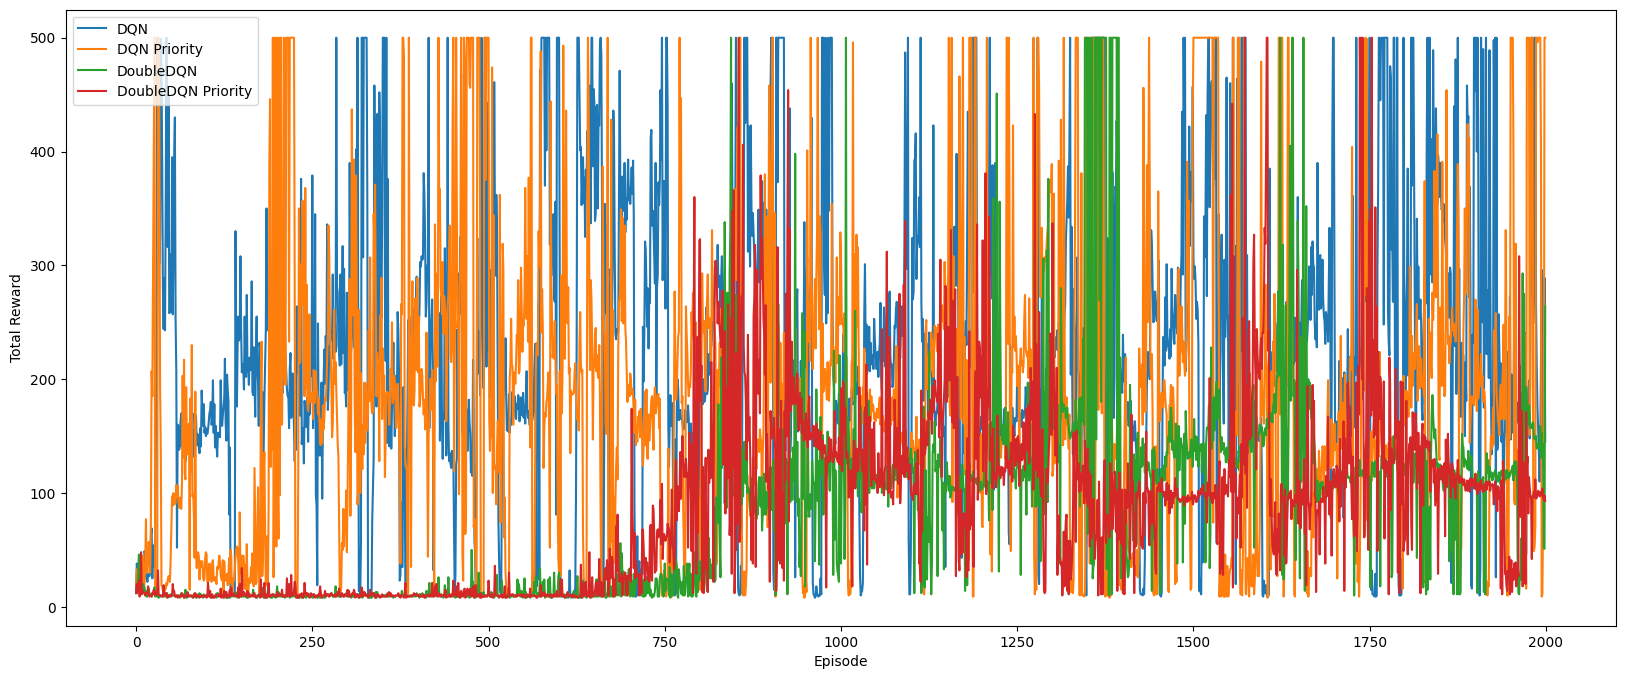

In [10]:
_, ax = plt.subplots(1, 1, figsize=(20, 8))
ax.plot(dqn_rewards, label='DQN')
ax.plot(dqn_priority_rewards, label='DQN Priority')
ax.plot(ddqn_rewards, label='DoubleDQN')
ax.plot(ddqn_priority_rewards, label='DoubleDQN Priority')
ax.legend()
ax.set_ylabel("Total Reward")
ax.set_xlabel("Episode")
plt.show()

Total reward: 500.0	Steps: 500


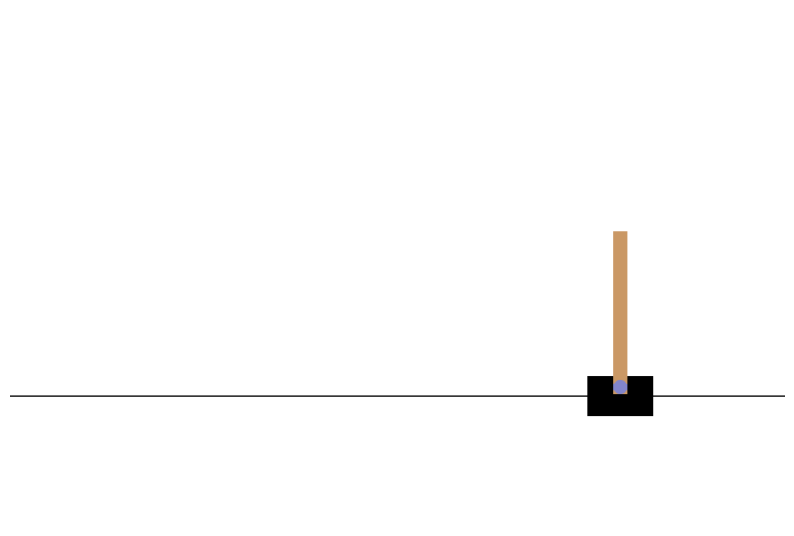

In [11]:
_, ax = plt.subplots(1, 1, figsize=(10, 8))
simulate_notebook(dqn_agent, env, ax)

Total reward: 96.0	Steps: 96


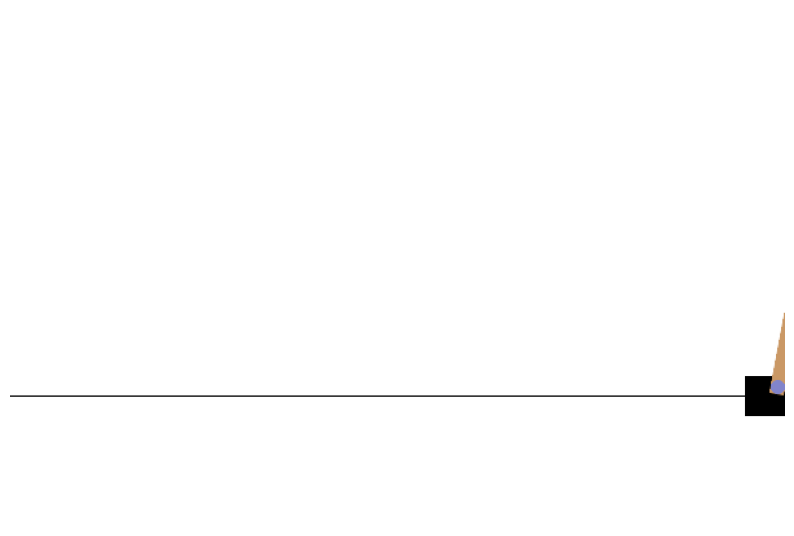

In [12]:
_, ax = plt.subplots(1, 1, figsize=(10, 8))
simulate_notebook(ddqn_agent, env, ax)